<a href="https://colab.research.google.com/github/p-kolluri/praharsh_data690/blob/main/assignment_04/Assignment_04_Part_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_04

Part B

# 1

In [1]:
import pandas as pd

data_url = "https://raw.githubusercontent.com/DATA-690-SPRING-2022/WANG/main/assignment_04/census_costs.txt"

# 2

In [3]:
df = pd.read_table(data_url, skiprows=1)
df.shape

(23, 4)

# 3

In [4]:
# First 10 rows
df.head(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
0,1790,"3,929,214","$44,377",1.13 cents
1,1800,"5,308,483","$66,109",1.24 cents
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
4,1830,"12,866,020","$378,545",2.94 cents
5,1840,"17,069,458","$833,371",4.88 cents
6,1850,"23,191,876","$1,423,351",6.14 cents
7,1860,"31,443,321","$1,969,377",6.26 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
9,1880,"50,155,783","$5,790,678",11.54 cents


In [5]:
# Last 10 rows
df.tail(10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
13,1920,"105,710,620","$25,117,000",23.76 cents
14,1930,"122,775,046","$40,156,000",32.71 cents
15,1940,"131,669,275","$67,527,000",51.29 cents
16,1950,"151,325,798","$91,462,000",60.44 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
20,1990,"248,718,301","$2,492,830,000",$10.02
21,2000,"281,421,906",$4.5 Billion,$15.99
22,2010*,"308,745,538",$13 Billion,$42.11


In [6]:
df.sample(n=10)

,Census Year,Total Population,Census Cost,Average Cost Per Person
2,1810,"7,239,881","$178,445",2.46 cents
3,1820,"9,633,822","$208,526",2.16 cents
5,1840,"17,069,458","$833,371",4.88 cents
8,1870,"38,558,371","$3,421,198",8.87 cents
17,1960,"179,323,175","$127,934,000",71.34 cents
20,1990,"248,718,301","$2,492,830,000",$10.02
14,1930,"122,775,046","$40,156,000",32.71 cents
18,1970,"203,302,031","$247,653,000",$1.22
19,1980,"226,542,199","$1,078,488,000",$4.76
6,1850,"23,191,876","$1,423,351",6.14 cents


# 4

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Census Year              23 non-null     object
 1   Total Population         23 non-null     object
 2   Census Cost              23 non-null     object
 3   Average Cost Per Person  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


# 5

In [8]:
df.describe()

,Census Year,Total Population,Census Cost,Average Cost Per Person
count,23,23,23,23
unique,23,23,23,23
top,1790,"3,929,214","$44,377",1.13 cents
freq,1,1,1,1


# 6

In [21]:
# Year

def cleanse_year(year_str):
    if "*" in year_str:
        year = year_str.replace("*", "")
    else:
        year = year_str

    return int(year)
    
df["year_cleansed"] = df["Census Year"].apply(cleanse_year)

df.head(1)    

,Census Year,Total Population,Census Cost,Average Cost Per Person,year_cleansed
0,1790,"3,929,214","$44,377",1.13 cents,1790


In [24]:
# Population

def cleanse_pop(pop_str):
  if "," in pop_str:
    pop = pop_str.replace(",","")
  else:
    pop = pop_str
  return int(pop)

df['cleansed_population'] = df['Total Population'].apply(cleanse_pop)

df.head(1)  

,Census Year,Total Population,Census Cost,Average Cost Per Person,year_cleansed,cleansed_population
0,1790,"3,929,214","$44,377",1.13 cents,1790,3929214


In [61]:
# Cost

def cleanse_cost(cost_str):
    cost = cost_str
    if "," in cost:
        cost = cost.replace("*", "")
    if "$" in cost:
        cost = cost.replace("$", "")
    if " Billion" in cost:
        cost = cost.replace(" Billion", "000000000")
    if "." in cost:
        cost = cost.replace(".", "")   
    if "," in cost:
        cost = cost.replace(",", "")     
        cost = round(float(cost))


    return float(cost)
df['cleansed_cost'] = df['Census Cost'].apply(cleanse_cost)

df.head(1)    

,Census Year,Total Population,Census Cost,Average Cost Per Person,year_cleansed,cleansed_population,cleansed_cost,avg_cost
0,1790,"3,929,214","$44,377",1.13 cents,1790,3929214,44377.0,NaN


In [77]:
# Cost per person

def avg_cost(avg_cost_str):
    avg_cost = avg_cost_str
    if "cents" in avg_cost:
        avg_cost = avg_cost.replace(" cents", "")
    if "$" == avg_cost[0]:
        avg_cost = avg_cost.replace("$", "")
    avg_cost = round(float(avg_cost)/100,4)
    return float(avg_cost)


df['avg_cost'] = df['Average Cost Per Person'].apply(avg_cost)

df.head(1)    

,Census Year,Total Population,Census Cost,Average Cost Per Person,year_cleansed,cleansed_population,cleansed_cost,avg_cost
0,1790,"3,929,214","$44,377",1.13 cents,1790,3929214,44377.0,0.0113


# 7

In [78]:
df.describe()

,year_cleansed,cleansed_population,cleansed_cost,avg_cost
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,2.705428e+09,0.179217
std,67.8233,9.622629e+07,9.613262e+09,0.202004
min,1790.0000,3.929214e+06,4.437700e+04,0.011300
25%,1845.0000,2.013067e+07,1.128361e+06,0.038500
50%,1900.0000,7.630339e+07,1.185400e+07,0.100200
75%,1955.0000,1.653245e+08,1.096980e+08,0.210450
max,2010.0000,3.087455e+08,4.500000e+10,0.713400


# 8

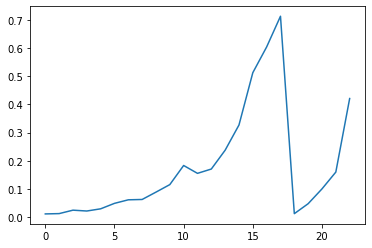

In [69]:
df["avg_cost"].plot(kind="line")

# 9

In [74]:
import numpy as np
import matplotlib.pyplot as plt

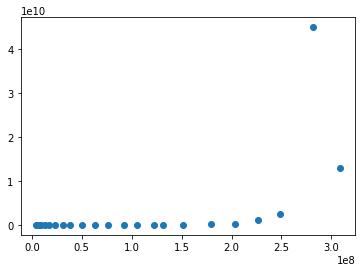

In [75]:
x = df["cleansed_population"]
y = df["cleansed_cost"]
plt.scatter(x, y)
plt.show()